# Visualization Task 2
### import liraries that is required
### import latest data and visualization from previous 
###  

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#Defining path and importing
path=r'C:\Users\banda\Instacart Basket Analysis'

ords_prods_cust_df=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_cust_dfmerge.pkl'))

In [3]:
ords_prods_cust_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Order_frequency_flag,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [4]:
ords_prods_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   order_number            int32         
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float64       
 6   product_id              object        
 7   add_to_cart_order       int32         
 8   reordered               int32         
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int32         
 12  prices                  float64       
 13  price_range_loc         object        
 14  busiest_period_of_day   object        
 15  busiest_days            object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  

### Importing image and displaying the image

In [5]:
Bar_order_day_of_week = plt.imread(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

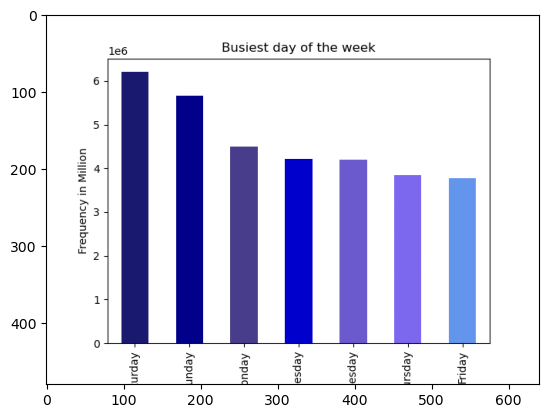

In [6]:
plt.imshow(Bar_order_day_of_week)


In [7]:
ords_prods_cust_df['orders_day_of_week']


0           2
1           3
2           3
3           4
4           4
           ..
32404854    4
32404855    6
32404856    1
32404857    6
32404858    1
Name: orders_day_of_week, Length: 32404859, dtype: int8

#### What are the Busiest days of the week?

Text(0, 0.5, 'Frequency in Million')

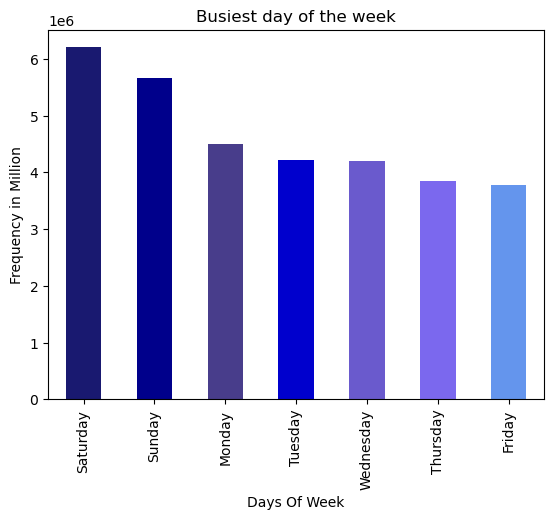

In [8]:
#creating a bar chart again and changing the display. defining the bar chart as bar
weekday_counts = ords_prods_cust_df['orders_day_of_week'].value_counts()
bar=ords_prods_cust_df['orders_day_of_week'].value_counts().plot.bar(color=['midnightblue','darkblue','darkslateblue','mediumblue','slateblue','mediumslateblue','cornflowerblue'])
weekday_counts = ords_prods_cust_df['orders_day_of_week'].value_counts()
x_labels = ['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']
plt.xticks(weekday_counts.index, x_labels)
plt.title('Busiest day of the week')
plt.xlabel('Days Of Week')
plt.ylabel('Frequency in Million')

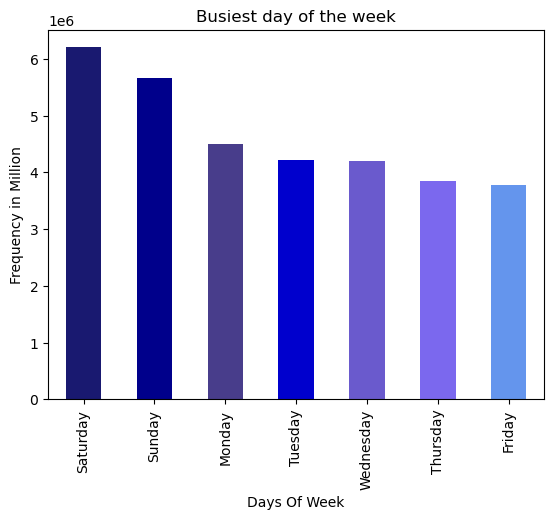

In [9]:
bar.figure

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_orders_dow1.png'))

#### Creating a Histogram of order_hour_of_day

Text(0, 0.5, 'Number of Orders')

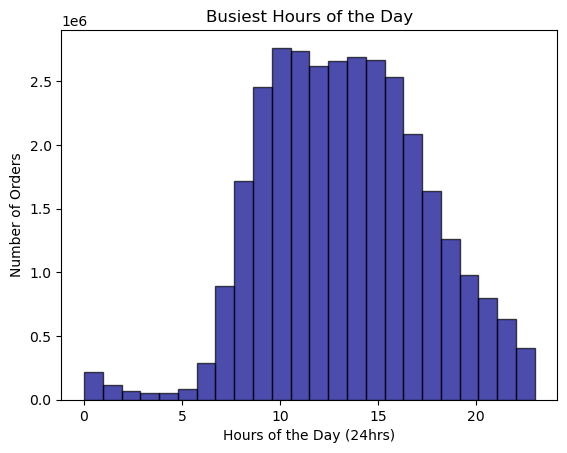

In [11]:
# ords_prods_cust_df DataFrame (creating a Histogram) and color defining 
#cmap='Greens_r' specifies a green colormap in reverse order (_r), where darker shades represent higher values.
His_ohod = ords_prods_cust_df['order_hour_of_day'].plot.hist(bins=24, edgecolor='black', color='darkblue', alpha=0.7) 

# Set title and axis labels
plt.title('Busiest Hours of the Day')
plt.xlabel('Hours of the Day (24hrs)')
plt.ylabel('Number of Orders')
#visual clarity
#added edge darker 


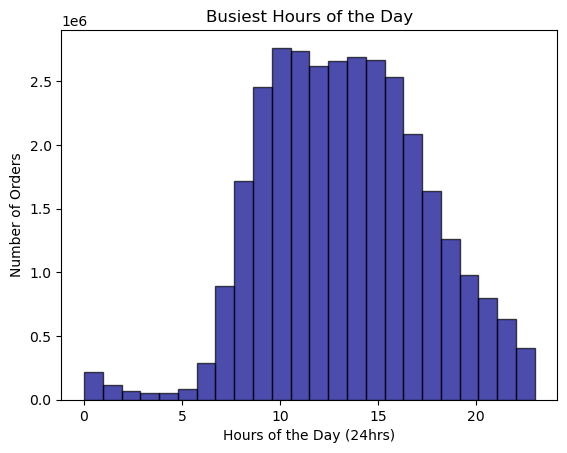

In [12]:
His_ohod.figure

Obervation
the busiest hours of the day are 9 am to 4 pm hence more orders are made in these hours

In [13]:
His_ohod.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/His_orders_ohod.png'))

Create a bar chart from the “loyalty_flag” column.

In [14]:
ords_prods_cust_df['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

Text(0, 0.5, 'Customer')

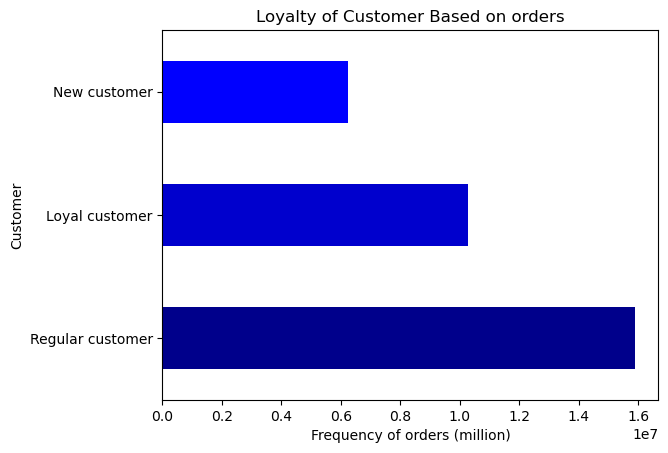

In [15]:
loyal_flag_bar =ords_prods_cust_df['loyalty_flag'].value_counts().plot.barh(color=['darkblue','mediumblue','blue'])
plt.title('Loyalty of Customer Based on orders')
plt.xlabel('Frequency of orders (million)')
plt.ylabel('Customer')

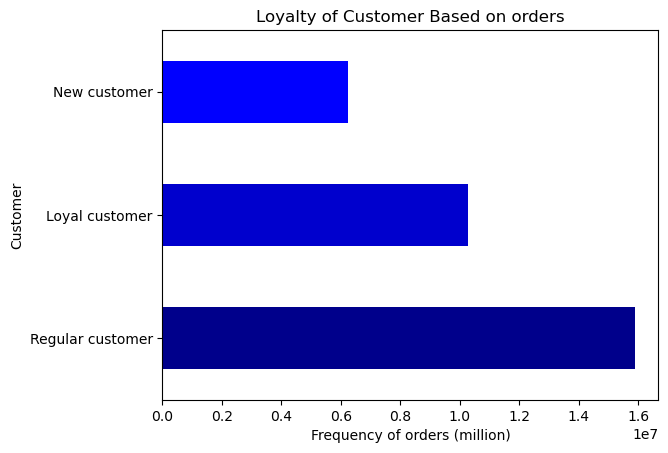

In [16]:
loyal_flag_bar.figure

In [17]:
# calculating percentage
loyalty_flag_count = pd.Series({
    'Regular customer': 15876776,
    'Loyal customer': 10284093,
    'New customer': 6243990})

# then Calculate total count
total_count = loyalty_flag_count.sum()

# Calculate percentage
loyalty_flag_percentage = (loyalty_flag_count / total_count) * 100

In [18]:
loyalty_flag_percentage=loyalty_flag_percentage.map('{:.2f}%'.format)

In [19]:
loyalty_flag_percentage

Regular customer    49.00%
Loyal customer      31.74%
New customer        19.27%
dtype: object

Observation:
Regular customer    49.00%
Loyal customer      31.74%
New customer        19.27%


In [20]:
loyal_flag_bar.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_loyalflag.png'))

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

since the data is tooo large to display for line chart will creat small and large random data.

In [21]:
np.random.seed(4)
#creating list holding True/False value to test Np.random rant <=0.7
dev = np.random.rand(len(ords_prods_cust_df)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
#stores big data 70%
big = ords_prods_cust_df[dev]

In [24]:
#stores small data 30%
small = ords_prods_cust_df[~dev]

Checking if it worked 

In [25]:
len(ords_prods_cust_df)

32404859

In [26]:
len(big)+len(small)

32404859

In [27]:
#this creates a new dataframe, df_2, that contains only the “prices” and “Hour_of_the_day” columns from your small subset
df_2 = small[['order_hour_of_day','prices']]

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


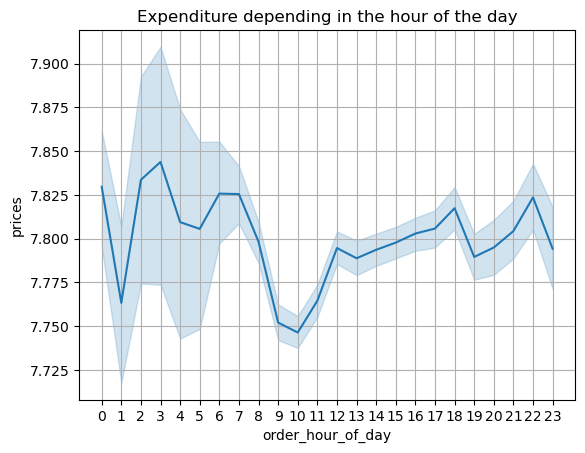

In [28]:
line = sns.lineplot(data=df_2,x='order_hour_of_day', y='prices')
plt.title('Expenditure depending in the hour of the day')
plt.xticks(range(24))
plt.grid()

Obervation:
first 3rd to  7th hours of the day are when customer spends the most 

Exporting the visualization

In [29]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_houroftheday_prices.png'))

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_houroftheday_prices.png')

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [30]:
Cust_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Cust_df_wrangle.pkl'))

In [31]:
Cust_df.head()

,user_id,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374


In [32]:
Cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               206209 non-null  object        
 1   First_name            206209 non-null  object        
 2   Last_name             206209 non-null  object        
 3   Gender                206209 non-null  object        
 4   State                 206209 non-null  object        
 5   Age                   206209 non-null  int8          
 6   date_joined           206209 non-null  datetime64[ns]
 7   Number_of_dependants  206209 non-null  int8          
 8   Family_status         206209 non-null  object        
 9   income                206209 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int8(2), object(6)
memory usage: 12.2+ MB


In [33]:
Cust_df['Family_status'].value_counts(dropna=False)

Family_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

In [34]:
Cust_df['Number_of_dependants'].value_counts(dropna=False)

Number_of_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

In [35]:
Cust_df['Age'].value_counts(dropna=False)

Age
19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, Length: 64, dtype: int64

In [36]:
Cust_df['Age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: Age, dtype: float64

In [37]:
df_age_dependants=Cust_df[['Age','Number_of_dependants']]

In [38]:
df_age_dependants.head()

,Age,Number_of_dependants
0,48,3
1,36,0
2,35,2
3,40,0
4,26,1


C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


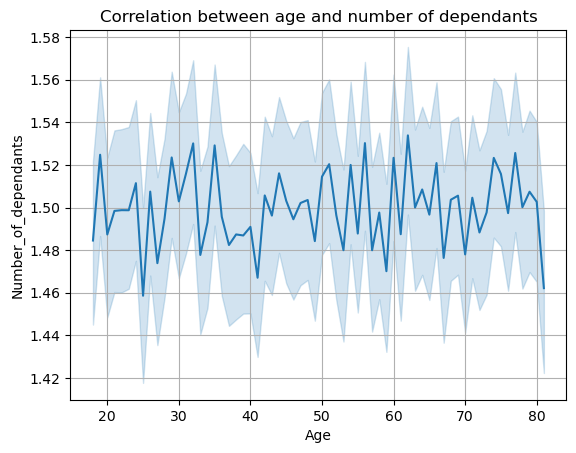

In [39]:
line_cust= sns.lineplot(data=df_age_dependants,x='Age', y='Number_of_dependants')
plt.title('Correlation between age and number of dependants')
plt.grid()

Obervation: there are no correlation between age and numbe of dependants.

you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

Exporting the visualization

In [40]:
line_cust.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Line_dependents_age.png'))

In [41]:
#creating subset for family 
Fam_user=Cust_df[['Family_status','user_id']]
#df.groupby('department_id').agg({'order_number': ['mean']})

In [42]:
Fam_user.head()

,Family_status,user_id
0,married,26711
1,single,33890
2,married,65803
3,single,125935
4,married,130797


In [43]:
#creating group by 
fam_users_demographic = Fam_user.groupby(['Family_status'], as_index=False).agg({'user_id': 'nunique'})

In [44]:
fam_users_demographic

,Family_status,user_id
0,divorced/widowed,17640
1,living with parents and siblings,9701
2,married,144906
3,single,33962


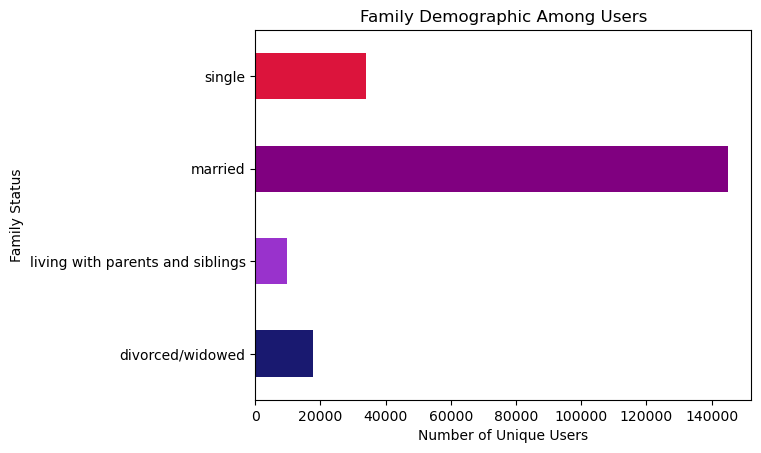

In [45]:
#creating bar chart 
bar_familyD = Fam_user.groupby('Family_status')['user_id'].nunique().plot(kind='barh', color=['midnightblue','darkorchid','purple','crimson'])
plt.title('Family Demographic Among Users')
plt.xlabel('Number of Unique Users')
plt.ylabel('Family Status')
plt.show()

Obervation: It is evident that married families shop more at Instacart compared to single individuals, those living with parents and siblings, and divorced/widowed individuals.

Exporting the visualization

In [46]:
bar_familyD.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_demo.png'))

sns.scatterplot()
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [47]:
Age_income_df=Cust_df[['Age','income']]

In [48]:
Age_income_df

,Age,income
0,48,165665
1,36,59285
2,35,99568
3,40,42049
4,26,40374
...,...,...
206204,44,148828
206205,62,168639
206206,66,53374
206207,27,99799


Text(0, 0.5, 'Income in dollars (Thousand)')

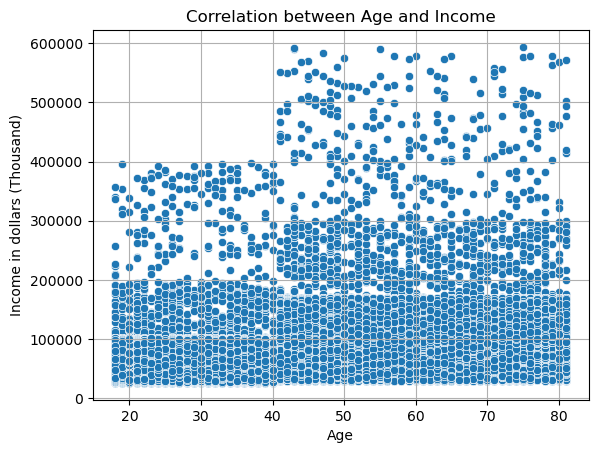

In [49]:
scatter_Age_income = sns.scatterplot(x='Age', y='income', data=Age_income_df)
plt.grid()
plt.title('Correlation between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income in dollars (Thousand)')

Obervation: there are no good correration here but you can see that few age 40 and above have giher incomes more than 400000

Exporting the visualization

In [50]:
scatter_Age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_incomecorrelation.png'))
